# Practical Assignment 3
#### *Submitted by Mukul Aryal (CS IV/I)*
##### Performing gradient descent in regression

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
import tqdm

In [2]:
# Prepare random dataset
data = np.random.randn(500, 2)

data.shape #[x, y]

(500, 2)

In [3]:
# Store params m and b in 'theta'
theta = np.zeros(2)
theta #[m,b]

array([0., 0.])

In [4]:
# Loss Function: MSE

def loss_function(data, theta):
    m,b = theta
    loss = 0
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        
        y_hat = m*x + b
        
        loss += (y-y_hat)**2
    
    return loss/len(data)

loss_function(data, theta)

np.float64(1.0451786909107617)

In [5]:
# Compute gradients of loss function wrt m and b

def compute_gradients(data, theta):
    gradients = np.zeros(2)
    N = float(len(data))
    m,b = theta
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b)) # wrt m
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b)) # wrt b
    
    epsilon=1e-6
    gradients = np.divide(gradients, N + epsilon)
    return gradients

compute_gradients(data, theta)    

array([-1.71471941e-04, -7.00058559e-05])

In [6]:
# Update Model Params

epochs = 50_000
lr = 1e-2 # learning rate
loss = []

for t in tqdm.tqdm(range(epochs)):
    gradients = compute_gradients(data, theta)
    theta = theta - (lr*gradients)
    loss.append(loss_function(data,theta))

100%|██████████| 50000/50000 [00:30<00:00, 1650.81it/s]


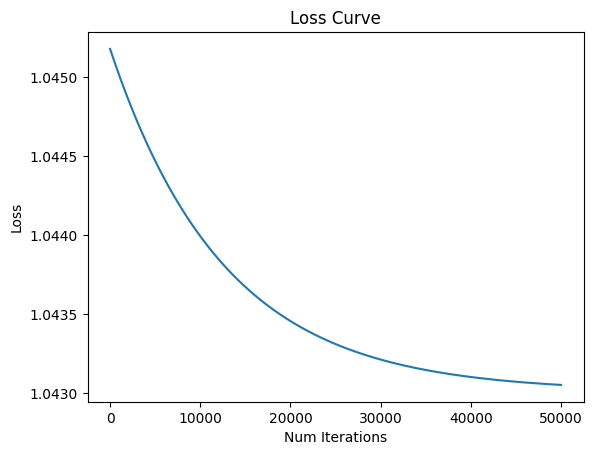

In [7]:
# Plot loss function
plt.plot(loss)
plt.title("Loss Curve")
plt.xlabel("Num Iterations")
plt.ylabel("Loss")
plt.show()